# NHL Rankings and KNN

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Load the Data**


Located in data folder, named as follows:
```
data/NHL_Data_GA.csv
```

In [48]:
nhl = pd.read_csv('data/NHL_Data_GA.csv')

**Missing Data and EDA**

In [49]:
nhl.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [50]:
nhl.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


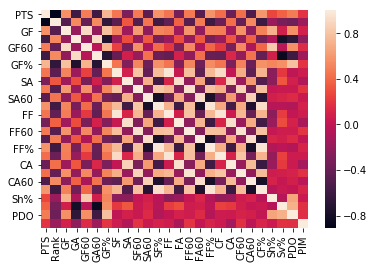

In [51]:
corr_matrix = nhl.corr()
sns.heatmap(corr_matrix)

In [52]:
corr_matrix.Rank.sort_values(ascending = False)

Rank    1.000000
CA60    0.537879
GA60    0.536279
GA      0.535782
FA60    0.477409
SA60    0.443970
CA      0.423351
FA      0.364666
SA      0.324561
PIM    -0.166454
Sh%    -0.168314
Sv%    -0.324691
PDO    -0.365246
CF     -0.383993
CF60   -0.403508
GF60   -0.409616
FF     -0.425059
SF     -0.446335
FF60   -0.466239
GF     -0.475713
SF60   -0.484563
SF%    -0.577347
FF%    -0.585340
CF%    -0.598466
GF%    -0.653633
PTS    -0.905004
Name: Rank, dtype: float64

**Rank**

Our goal is to use the data given to predict the `Rank` variable.  If we determine the baseline accuracy as the actual proportion in each class, determine these values for each unique Rank in the column.

In [53]:
nhl.Rank.value_counts(normalize = True)

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

**Predictor Variables**

Choose four features to use as predictors, identify this set as your `X` matrix, and the `Rank` column as your `y` variable.

In [54]:
X = nhl[['GA60', 'GF60', 'CF60', 'CA60']]
y = nhl.Rank

**Fit**

Fit a `KNeighborsClassifier` with 1 neighbor.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [58]:
predictions = knn.predict(X)

In [59]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [60]:
predicprob = knn.predict_proba(X)

In [63]:
predicprob[::5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

**Accuracy**

  |  | $C_0$ | $C_1$ |
  | ----- | ----- | ----- |
  | $C_0$|  | |
  | $C_1$|  |  |
  
  **Precision**: Proportion of values from thos predicted to be in $C_1$ correctly.
  
  $$\frac{TP}{TP + FP}$$
  
  **Recall**: Proportion of values that are actually in $C_1$ predicted correctly.
  
  $$\frac{TP}{TP + FN}$$
  
  Ideally, we'd like this to be as high as possible in each regard.  We can understand the relationship between Precision and Recall through their harmonic mean -- the F1 score.
  
  **F1**: Harmonic mean of Precision and Recall
  
  $$\frac{2PR}{P + R}$$

Use the `predict` and `accuracy_score()` methods to determine the accuracy of your model.

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y, predictions)

1.0

**Train Test Split**

Now split the data into two equal sized groups. Fit the model on your training set and determine its accuracy (again using $k = 1$).  Repeat with $k = \#$ rows in training set.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [71]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.5217391304347826

In [72]:
X_train, X_test, y_train, y_test= train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors = len(X_train))
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.2608695652173913

### Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [75]:
X_train, X_test, y_train, y_test= train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors = int(len(X_train)/10))
knn.fit(X_train, y_train)
cross_val_score(knn, X_train, y_train, cv = 10)

array([0.5       , 0.5       , 0.28571429, 0.42857143, 0.57142857,
       0.28571429, 0.66666667, 0.5       , 0.66666667, 0.        ])

**Grid Search**

Use a grid search to investigate the use of $k$ from 2 through the number of rows in the training data.  Plot your results with your $x$ variables as $k$, and $y$ as the accuracy for $k$.

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
params = [{'n_neighbors': 
           [i for i in np.arange(2, int(0.8*len(X_train)))]
}
         ]
          
grid = GridSearchCV(knn, param_grid= params, cv = 5)

In [110]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [112]:
grid.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.00090961, 0.00077691, 0.00077548, 0.00069304, 0.00071659,
        0.0006772 , 0.00066915, 0.00067515, 0.0006834 , 0.0006784 ,
        0.00067201, 0.00098519, 0.00074277, 0.00067286, 0.00068183,
        0.00068879, 0.00069499, 0.00071788, 0.00067282, 0.00068049,
        0.00066915, 0.00068026, 0.00096927, 0.00068717, 0.00065184,
        0.0006309 , 0.0006587 , 0.00065727, 0.00063   , 0.00062509,
        0.00061851, 0.00062661, 0.00062819, 0.0006197 , 0.00063543,
        0.0006372 , 0.00062866, 0.00062528, 0.00061541, 0.00085659,
        0.00065632, 0.00065722, 0.00064459, 0.0006259 , 0.00061197,
        0.00061178, 0.00062017, 0.00061383, 0.0006196 , 0.00061398,
        0.0006114 ]),
 'mean_score_time': array([0.0007452 , 0.00058804, 0.00059032, 0.00056138, 0.00056248,
        0.000562  , 0.00057144, 0.00059786, 0.00057192, 0.00057392,
        0.00057421, 0.00080781, 0.00058661, 0.00058379, 0.00058217,
        0.00061421, 0.00062509, 0.0005868 , 0.00058479, 0.

In [113]:
grid.cv_results_['std_train_score']

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.01602144, 0.04319381, 0.06168129, 0.04171353, 0.07127202,
       0.06856009, 0.03626581, 0.03676386, 0.04064025, 0.03006558,
       0.03618085, 0.02961257, 0.04366945, 0.02805705, 0.02544409,
       0.04699109, 0.04473722, 0.01988884, 0.04576212, 0.02248808,
       0.02299085, 0.02730473, 0.04107746, 0.0342059 , 0.05015623,
       0.04035989, 0.05503223, 0.06267067, 0.03980316, 0.05109784,
       0.06516049, 0.05219738, 0.05388237, 0.05391402, 0.04267077,
       0.05038999, 0.04404339, 0.06049598, 0.05879236, 0.05670518,
       0.04322882, 0.03416483, 0.04309588, 0.03653532, 0.04639755,
       0.02905778, 0.02622359, 0.00919689, 0.00487619, 0.00487619,
       0.00487619])

In [114]:
k = grid.cv_results_['param_n_neighbors'].data
test_scores = grid.cv_results_['mean_test_score'].data
k

array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
      dtype=object)

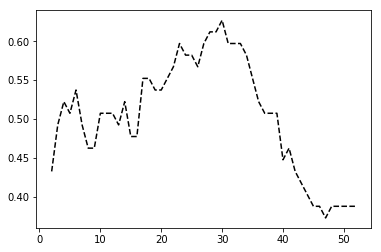

In [115]:
plt.plot(k, test_scores, '--k')

**Standardized Data**

Repeat the above problem using the `StandardScaler()` to transform your data and plot the results together with those of non-standardized data.  Interpret the results.

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
ss = StandardScaler()
X2 = ss.fit_transform(X_train)

In [118]:
grid.fit(X2,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
numero_uno = grid.best_estimator_

In [120]:
y_pred_class = numero_uno.predict(X2)
accuracy_score(y_train, y_pred_class)

0.746268656716418

In [121]:
k2 = grid.cv_results_['param_n_neighbors'].data
test_scores2 = grid.cv_results_['mean_test_score'].data

Text(0,0.5,'Mean Test Score')

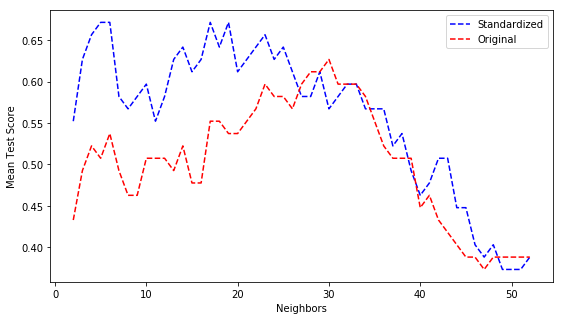

In [124]:
plt.figure(figsize = (9, 5))
plt.plot(k2, test_scores2, '--b', label= 'Standardized')
plt.plot(k, test_scores, '--r', label = 'Original')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Mean Test Score')